# 05. Teoria mnogości - część 2

**Tresci kształcenia:** Podstawy teorii mnogości. Zbiory i operacje na zbiorach. Pojęcie zbioru, zbioru pustego, elementu, należenia, inkluzji. Podzbiory prostej rzeczywistej, przedziały, suma, przekrój, różnica zbiorów. Zbiory przeliczalne i nieprzeliczalne. 

**Efekty kształcenia:** Student potrafi wykonać podstawowe operacje na zbiorach, określić ich przeliczalność. 

---
# Iloczyn kartezjański zbiorów

Zajęcia te zaczniemy od przedstawienia jeszcze jednej operacji na zbiorach - iloczynu kartezjańskiego. Przed zdefiniowaniem tego pojęcia, musimy powiedzieć, czym jest **para uporządkowana**. Jest to kolekcja dwóch elementów, w której kolejność ma znaczenie. Innymi słowy dwie pary uporządkowane $(x_1, y_1)$ oraz $(x_2, y_2)$ są równe, jeżeli $x_1 = x_2$ oraz $y_1 = y_2$. Parę uporządkowaną dwóch liczb można przedstawić graficznie jako punkt na płaszczyźnie.

> **Definicja**
>> **Iloczynem kartezjańskim** zbiorów A oraz B nazywamy zbiór:

$$
\{ (a, b) : a \in A, b \in B \},
$$

tzn. zbiór złożony z par uporządkowanych $(a, b)$, gdzie $a \in A$, zaś $b \in B$. Zbiór ten oznaczamy jako $A \times B$.

### Przykład

Zbiór $\{ \color{blue}{1, 2, 3} \} \times \{ \color{green}{2, 4}\}$ ma sześć elementów. Są to pary $(\color{blue} 1, \color{green}2), (\color{blue} 1, \color{green}4), (\color{blue} 2, \color{green}2), (\color{blue} 2, \color{green}4), (\color{blue} 3, \color{green}2), (\color{blue} 3, \color{green}4)$. Możemy zatem przedstawić go graficznie na płaszczyźnie w następujący sposób:

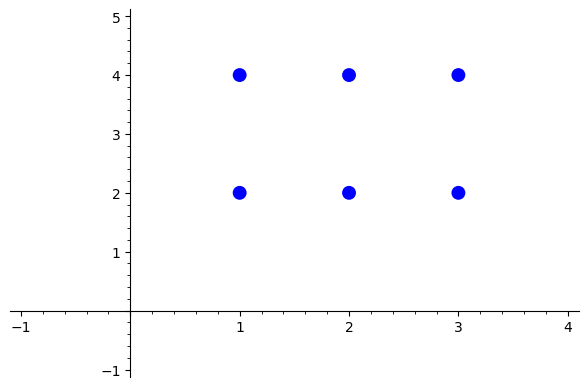

In [32]:
#Rysujemy podane punkty.

from sage.plot.point import Point
P = point([(i, j) for i in range(1, 4) for j in [2, 4]], size=100)
P.show(xmin=-1, xmax=4, ymin=-1, ymax=5)

In [2]:
#Aby znaleźć iloczyn kartezjański dwóch zbiorów skończonych w Pythonie, można skorzystać z funkcji product z pakietu itertools.

import itertools
A = Set([1, 2, 3])
B = Set([2, 4])
AxB = Set(itertools.product(A, B))
print(AxB)

#Alternatywnie, można ręcznie utworzyć zbiór par uporządkowanych.
A_x_B = Set([(a, b) for a in A for b in B])
print(A_x_B)

{(2, 4), (1, 2), (3, 4), (2, 2), (3, 2), (1, 4)}
{(2, 4), (1, 2), (3, 4), (2, 2), (3, 2), (1, 4)}


### Przykład

Niech $A = (1, 2] \cup \{ 3 \}$, zaś $B = [2, 3)$. Narysuj na płaszczyźnie zbiór $A \times B$.

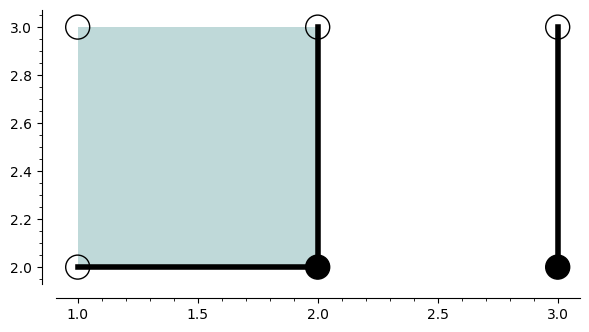

In [3]:
#Rysujemy iloczyn kartezjański. Osobno rysujemy kwadrat bez krawędzi, a następnie dodajemy trzy odcinki (dwa boki kwadratu i jeden osobny odcinek)

kwadrat = polygon2d([[1,2], [1,3], [2, 3], [2,2]], fill=True, thickness=0, color=(0.75, 0.85, 0.85), edgecolor = 'black')
prawa_krawedz = line([(2,2), (2,3)], color = 'black', thickness = 4)
dolna_krawedz = line([(1,2), (2,2)], color = 'black', thickness = 4)
odcinek = line([(3,2), (3,3)], color = 'black', thickness = 4)
wierzcholek1 = circle((2, 2), 0.05, rgbcolor = 'black', fill = True)
wierzcholek2 = circle((1, 2), 0.05, fill = False, edgecolor='black')
wierzcholek3 = circle((1, 3), 0.05, fill = False, edgecolor='black')
wierzcholek4 = circle((2, 3), 0.05, fill = False, edgecolor='black')
wierzcholek5 = circle((3, 2), 0.05, fill = True, color = 'black', edgecolor='black')
wierzcholek6 = circle((3, 3), 0.05, fill = False, edgecolor='black')

(kwadrat+prawa_krawedz+dolna_krawedz+odcinek+wierzcholek1+wierzcholek2+wierzcholek3+wierzcholek4+wierzcholek5+wierzcholek6).show()

---
# Moc zbiorów

W drugiej części zajęć zajmiemy się **mocą** zbiorów, czyli intuicyjnie mówiąc, liczbą ich elementów. Moc zbioru $A$ oznaczamy jako $|A|$. Mamy na przykład $|\{ 1, 2, 3  \}| = 3$. Jeżeli zbiory $A$ oraz $B$ są skończone, to $|A \times B| = |A| \cdot |B|$. Przykładowo:
$|\{ 1, 2, 3 \} \times \{ 2, 4 \}| = 3 \cdot 2 = 6$ (patrz przykład wyżej). 

## Zasada włączeń i wyłączeń

Załóżmy, że w restauracji 10 klientów zamówiło zupę, a 15 drugie danie. Zastanówmy się, ilu klientów może mieć w obecnej chwili restauracja? Możliwości są różne:
- Z jednej strony, każdy klient, który zamówił zupę, mógł też zamówić drugie danie. W takim przypadku klientów jest 15.
- Z drugiej strony mogło zdarzyć się tak, że żaden klient, którzy zamówił zupę, nie zamówił drugiego dania. Wtedy klientów byłoby $10+15 = 25$.
- Jest też możliwa każda pośrednia opcja - część klientów, która zamówiła zupę, zamówiła też drugie danie.

W każdym wypadku widzimy, że liczba klientów zależy od tego, ile klientów zamówiło i zupę, i drugie danie (czyli od **przekroju** zbiorów klientów zamawiających zupę i zbioru klientów zamawiających drugie danie). Z matematycznego punktu widzenia, dostajemy wzór:

$$
|A \cup B| = |A| + |B| - |A \cap B|,
$$

zwany **zasadą włączeń i wyłączeń dla dwóch zbiorów**. Podobnie mówi się o **zasadzie włączeń i wyłączeń dla trzech zbiorów**:

$$
|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |B \cap C| - |C \cap A| + |A \cap B \cap C|,
$$

a także dla większej liczby zbiorów. Poniżej znajdziecie krótki dowód graficzny zasady włączeń i wyłączeń dla dwóch zbiorów.

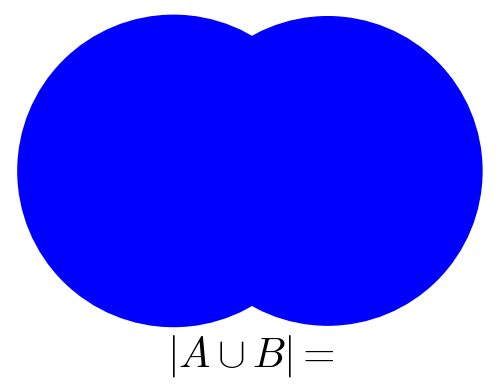

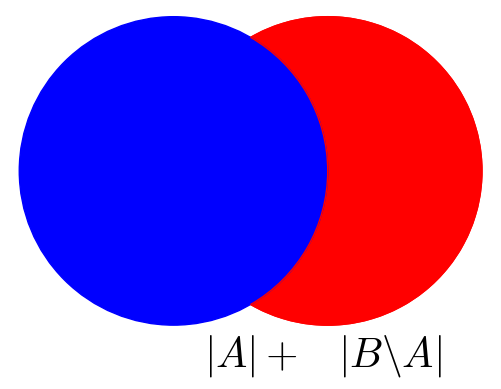

In [4]:
#Kod rysujący diagramy Venna.
A1 = circle((0, 0), 1, color = 'blue', fill=True, edgecolor = 'black', thickness=3, linestyle='solid')
B1 = circle((1, 0), 1, color = 'blue', fill=True, alpha=1, edgecolor = 'black')

(A1+B1+ text(r'$|A \cup B| = $',(0.5,-1.2),rgbcolor='black', fontsize=30)).show(axes=false)

A = circle((0, 0), 1, color = 'blue', fill=True, alpha=1) + text(r'$|A| + $',(0.5,-1.2),rgbcolor='black', fontsize=30)
B = circle((1, 0), 1, color = 'red', fill=True, alpha=1, zorder=2)

BminA = arc((1,0), 1, sector=(pi+pi/3, pi+5*pi/3), color='red')+arc((0,0), 1, sector=(pi+2*pi/3,pi+4*pi/3), color='red')+text(r'$|B \backslash A|$',(1.4,-1.2),rgbcolor='black', fontsize=30)
(A+B+BminA).show(axes=false)

### Przykład

Ile jest liczb całkowitych dodatnich nie większych niż 10000 podzielnych co najmniej przez jedną z liczb: 2, 3 lub 5? 

### Rozwiązanie

Niech $A_2 = \{ x \in \mathbb Z_+ : x \le 10000, 2|x \}$, $A_3 = \{ x \in \mathbb Z_+ : x \le 10000, 3|x \}$, $A_5 = \{ x \in \mathbb Z_+ : x \le 10000, 5|x \}$
będą zbiorami liczb całkowitych dodatnich nie większych niż 10000 oraz podzielnych przez odpowiednio 2, 3 lub 5. Wtedy zbiór liczb podzielnych przez 2, 3 lub 5 to

$$
A_2 \cup A_3 \cup A_5.
$$

Zauważmy, że:

$$
|A_2| = |\{ 2, 4, 6, 8, \ldots, 10000 \}| = 10000/2 = 5000.
$$

Ponadto $|A_2 \cap A_3|$ to zbiór liczb podzielnych przez $2$ oraz przez $3$, czyli przez $2 \cdot 3 = 6$. Stąd:
$A_2 \cap A_3 = \{ 6, 12, 18, ... \}$.
Zauważmy, że $10000/6 \approx 1666,66$, zatem największą liczbą w tym zbiorze jest $6 \cdot 1666 = 9996$ oraz $|A_2 \cap A_3| = 1666$.
Analogicznie zauważamy, że
$A_2 \cap A_3 \cap A_5 = \{ 30, 60, 90, \ldots \}$
oraz że największą liczbą w tym zbiorze jest $30 \cdot 333$ (ponieważ $10000/30 \approx 333,33$). Stąd $|A_2 \cap A_3 \cap A_5| = 333$.

W podobny sposób obliczamy, że $|A_3| = 3333$, $|A_5| = 2000$, $|A_2 \cap A_5| = 1000$ oraz $|A_3 \cap A_5| = 666$. Zatem korzystając z zasady włączeń i wyłączeń:

$$
|A_2 \cup A_3 \cup A_5| = |A_2| + |A_3| + |A_5| - |A_2 \cap A_3| - |A_2 \cap A_5| - |A_3 \cap A_5| + |A_2 \cap A_3 \cap A_5| = 5000 + 3333 + 2000 - 1666 - 1000 - 666 + 333 = 7334.
$$

Nasz wynik sprawdzimy za pomocą prostego programu komputerowego.

In [5]:
# Zmienna podzielne_przez_2_3_5 zlicza ilość szukanych liczb.
podzielne_przez_2_3_5 = 0
for i in range(1, 10001):
    if i%2 == 0 or i%3 == 0 or i%5 == 0:
        podzielne_przez_2_3_5 += 1
print("Istnieje", podzielne_przez_2_3_5, "liczb całkowitych dodatnich nie większych niż 10000 i podzielnych co najmniej przez jedną z liczb 2, 3 lub 5.")

Istnieje 7334 liczb całkowitych dodatnich nie większych niż 10000 i podzielnych co najmniej przez jedną z liczb 2, 3 lub 5.


### Przykład
W sondażu dotyczącego umiejętności języka angielskiego wzięło udział 100 osób. Spośród nich:
- 28 osób zna język angielski,
- 33 osoby znają język niemiecki,
- x osób zna język francuski,
- 16 osób zna język angielski i niemiecki,
- 13 osób zna język angielski i francuski,
- y osób zna język niemiecki i francuski,
- 7 osób zna wszystkie trzy języki.

Czy to możliwe, że

(a) x = 59, y = 12,

(b) x = 59, y = 25,

(c) x = 75, y = 12?

*Wskazówka: skorzystaj z apletu poniżej. W podpunkcie (b), co dzieje się gdy $x = 59$, zaś $y = 12, 13, \ldots, 25$? W podpunkcie (c), co dzieje się gdy $y = 12$, zaś $x = 59, \ldots, 75$?*

### Rozwiązanie
Zbiory osób znających język angielski, niemiecki lub francuski będziemy oznaczali odpowiednio literami $A$, $N$, $F$.

(a) Zauważmy, że

$$
|A \setminus (N \cup F)| = |A| - |A \cap N| - |A \cap F| + |A \cap N \cap F| = 6
$$

$$
|N \setminus (A \cup F)| = |N| - |N \cap A| - |N \cap F| + |A \cap N \cap F| = 12
$$

$$
|F \setminus (N \cup A)| = |F| - |F \cap N| - |F \cap A| + |A \cap N \cap F| = 41
$$

-można zatem łatwo wskazać przykład, uzupełniając odpowiednie składowe diagramu Venna liczbami tak, jak pokazuje aplet poniżej.

(b) Mamy:

$$
|N \setminus (A \cup F)| = |N| - |N \cap A| - |N \cap F| + |A \cap N \cap F| = 33 - 25 - 16 + 7 = -1,
$$

co daje sprzeczność.

(c) Zgodnie z zasadą włączeń i wyłączeń:

$$
|A \cup N \cup F|  = |A| + |N| + |F| - |A \cap N| - |N \cap F| - |A \cap F| + |A \cap N \cap F| = 28 + 33 + 75 -16-13 - 12 + 7 = 102.
$$

Ale w sondażu brało udział sto osób! Sprzeczność kończy dowód!

In [1]:
def zbiory(Z, YZ):
    T = 100
    X = 28
    Y = 33
    XY = 16
    XZ = 13
    XYZ = 7
    
    centers = [(cos(n*2*pi/3), sin(n*2*pi/3)) for n in [0,1,2]]
    scale = 1.7
    clr = ['yellow', 'blue', 'green']
    G = Graphics()
    for i in range(3):
        G += circle(centers[i], scale, rgbcolor=clr[i],
             fill=True, alpha=0.3)
    for i in range(3):
        G += circle(centers[i], scale, rgbcolor='black')
   
    # etykiety
    G += text('Język angielski',(4,1),rgbcolor='black')
    G += text('Język niemiecki',(-1,3),rgbcolor='black')
    G += text('Język francuski',(-1,-3),rgbcolor='black')
   
    # przecięcia par zbiorów
    ZX=XZ-XYZ
    G += text(ZX, (1.3*cos(2*2*pi/3 + pi/3), 1.3*sin(2*2*pi/3 + pi/3)), rgbcolor='black')
    YX=XY-XYZ
    G += text(YX, (1.3*cos(0*2*pi/3 + pi/3), 1.3*sin(0*2*pi/3 + pi/3)), rgbcolor='black')
    ZY=YZ-XYZ
    G += text(ZY, (1.3*cos(1*2*pi/3 + pi/3), 1.3*sin(1*2*pi/3 + pi/3)), rgbcolor='black')
  
    # osoby znające tylko jeden język
    XX=X-ZX-YX-XYZ
    G += text(XX, (1.5*centers[0][0],1.7*centers[0][1]), rgbcolor='black')
    YY=Y-ZY-YX-XYZ
    G += text(YY, (1.5*centers[1][0],1.7*centers[1][1]), rgbcolor='black')
    ZZ=Z-ZY-ZX-XYZ
    G += text(ZZ, (1.5*centers[2][0],1.7*centers[2][1]), rgbcolor='black')
 
    # osoby znające trzy języki
    G += text(XYZ, (0,0), rgbcolor='black')
   
    # osoby nieznające języków
    C = T-XX-YY-ZZ-ZX-ZY-YX-XYZ
    G += text("Osoby nieznające języków:",(2,-3),rgbcolor='black')
    G += text(C,(4,-3),rgbcolor='black')
    
    # Czy wynik jest możliwy do uzyskania?
    if XYZ>XY or XYZ>XZ or XYZ>YZ or XY>X or XY>Y or XZ>X or XZ>Z or YZ>Y or YZ>Z or C<0 or XYZ<0 or XZ<0 or YZ<0 or XY<0 or X<0 or Y<0 or Z<0 or XX<0 or YY<0 or ZZ<0:
        print('Taka sytuacja jest niemożliwa!')
    else:
        
        return G
        
@interact
def _(x=slider([0..100],default=59,label='Francuski'),y=slider([0..100],default=12,label='Niemiecki i francuski')):
    G = zbiory(Z = x, YZ = y)
    G.show(aspect_ratio=1, axes=False)

#Przykład dla konkretnych wartości.
#
zbiory_a = zbiory(Z = 59, YZ = 12) + text("x = 59, y = 12", (4, 3), fontsize = 40)

zbiory_b = [zbiory(Z = 59, YZ = 12) + text("x = 59, y = 12", (4, 3), fontsize = 30)]
zbiory_b.append(zbiory(Z = 59, YZ = 20) + text("x = 59, y = 20", (4, 3), fontsize = 30))
zbiory_b.append(zbiory(Z = 59, YZ = 24) + text("x = 59, y = 24", (4, 3), fontsize = 30))

zbiory_c = [zbiory(Z = 60, YZ = 12) + text("x = 60, y = 12", (4, 3), fontsize = 30)]
zbiory_c.append(zbiory(Z = 65, YZ = 12) + text("x = 65, y = 12", (4, 3), fontsize = 30))
zbiory_c.append(zbiory(Z = 73, YZ = 12) + text("x = 73, y = 12", (4, 3), fontsize = 30))

Interactive function <function _ at 0x7f4bbb925b80> with 2 widgets
  x: SelectionSlider(value=59, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100), description='Francuski')
  y: SelectionSlider(value=12, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100), description='Niemiecki i francuski')

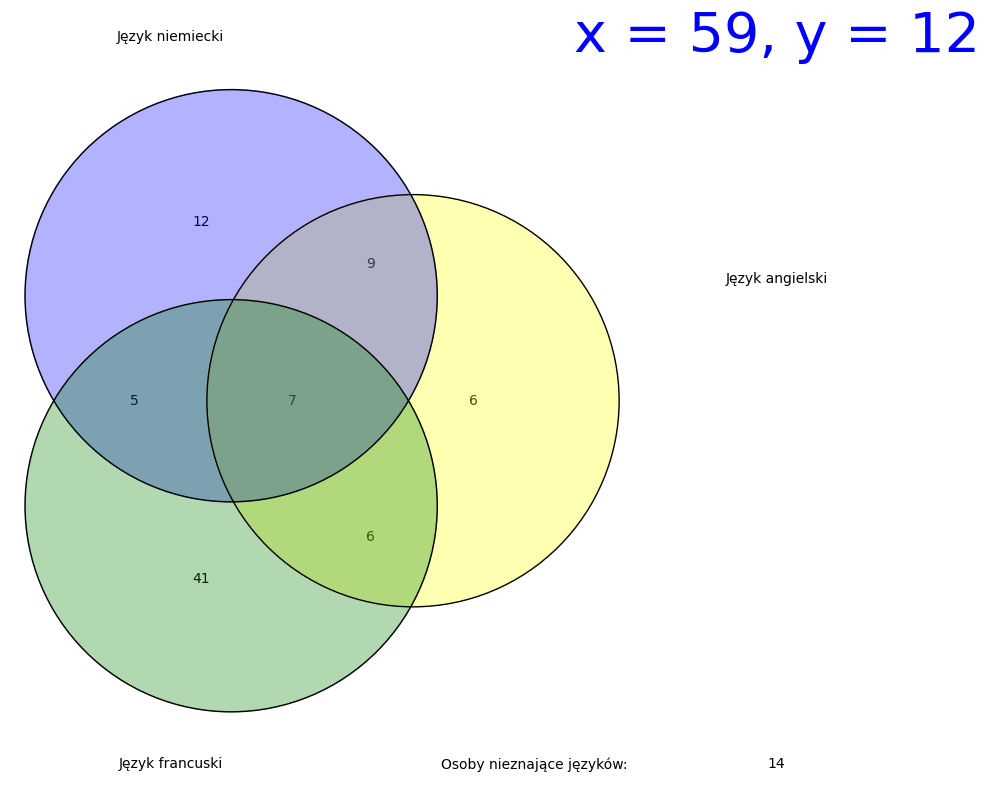

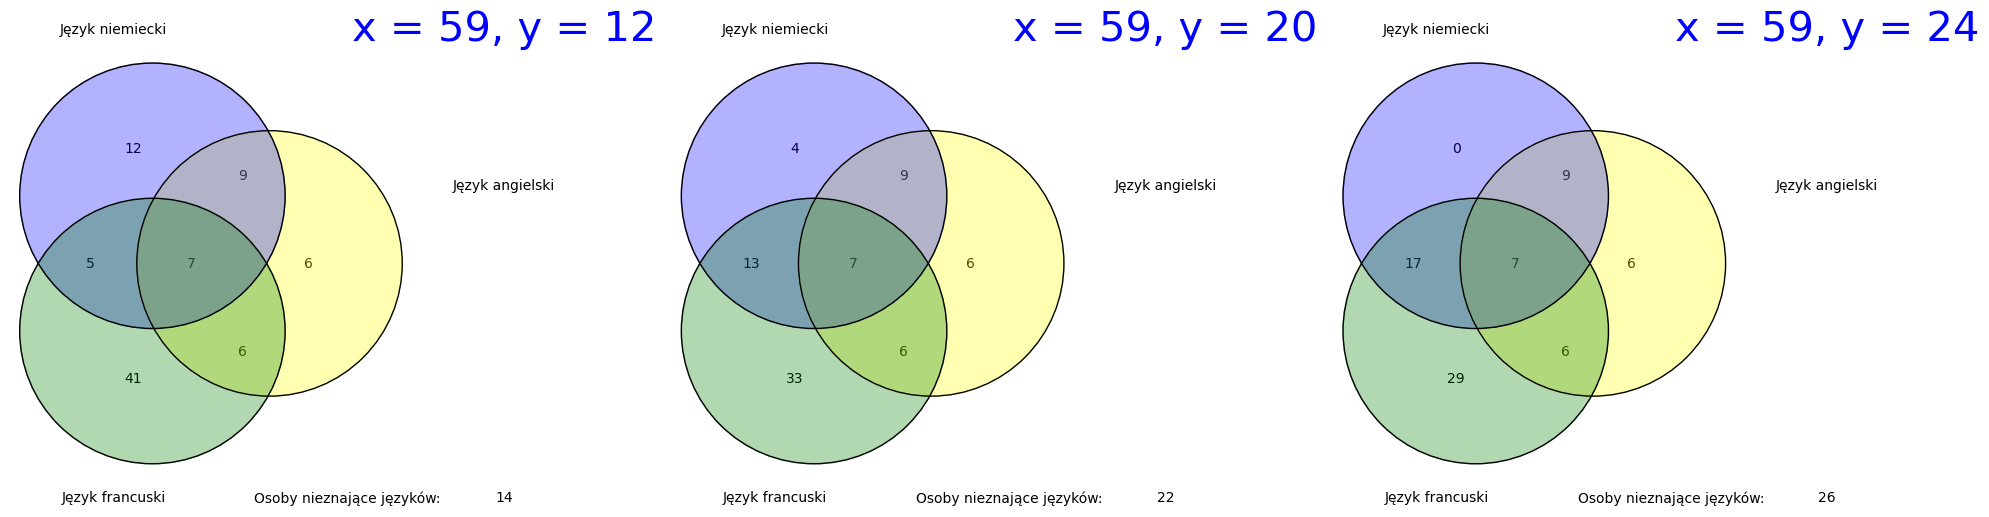

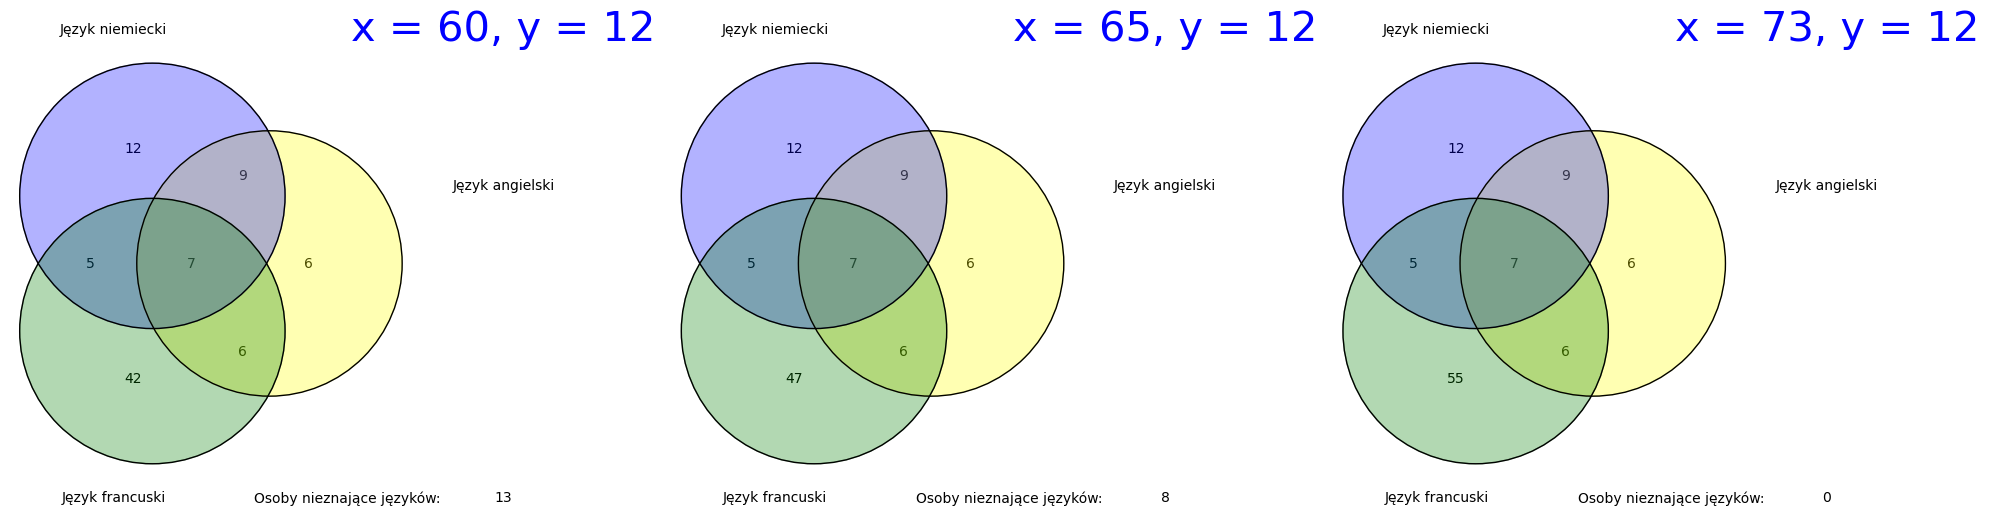

In [7]:
#Narysujemy przykładowe ustawienia x, y dla wartości ważnych w odpowiednich podpunktach.
zbiory_a.show(figsize=[10,10], axes=False)
g1=graphics_array(zbiory_b,ncols=3)
g1.show(figsize=[20,20], axes = False, ymin = -3, ymax = 3)

g2=graphics_array(zbiory_c,ncols=3)
g2.show(figsize=[20,20], axes = False, ymin = -3, ymax = 3)

### Przykład

Ile elementów ma zbiór

$$
(\{ -2, -1, \ldots, 2 \} \times \{ -3, -2, \ldots, 2 \}) \cup (\{ 1, 2, 3, 4 \} \times \{ 0, 1, 2, 3, 4 \})?
$$

Niech $A = \{ -2, -1, \ldots, 2 \} \times \{ -3, -2, \ldots, 2 \}$, zaś $B = \{ 1, 2, 3, 4 \} \times \{ 0, 1, 2, 3, 4 \}$. Wtedy $|A| = 5 \cdot 6 = 30$ oraz $|B| = 4 \cdot 5 = 20$. Ponadto $A \cap B = \{ 1, 2 \} \times \{ 0, 1, 2 \}$. Stąd:

$$
|A \cup B| = |A| + |B| - |A \cap B| = 30 + 20 - 6 = 44.
$$

In [10]:
# A to zbiór {-2, ..., 2}x{-3, ..., 2}, zaś B to zbiór {1, ..., 4}x{0, ..., 4}.
#Podany program podaje moc ich sumy.
A = Set([(i, j) for i in range(-2, 3) for j in range(-3, 3)])
B = Set([(i, j) for i in range(1, 5) for j in range(0, 5)])
S = A.union(B)
print(S.cardinality())

44


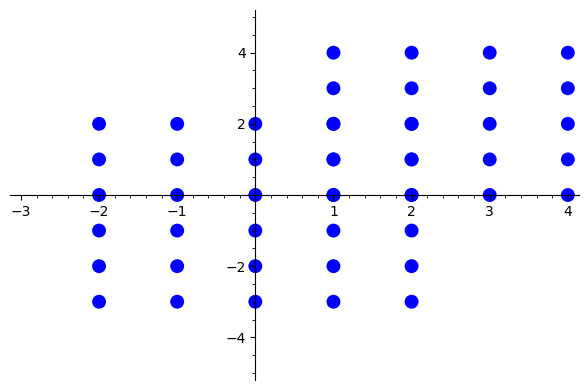

In [11]:
# Narysujmy rozważany zbiór.

from sage.plot.point import Point
P = point([(i, j) for i in range(-2, 3) for j in range(-3, 3)], size=100)
P += point([(i, j) for i in range(1, 5) for j in range(0, 5)], size=100)
P.show(xmin=-3, xmax=4, ymin=-5, ymax=5)

## Zbiory przeliczalne i nieprzeliczalne

Oprócz zbiorów skończonych mamy również zbiory nieskończone. Co ciekawe, okazuje się, że istnieją "większe" i "mniejsze" zbiory nieskończone! 

> **Definicja** 
>>Mówimy, że zbiór $A$ jest przeliczalny, jeżeli jego elementy można ustawić w ciąg (skończony lub nie).

### Przykład

Zbiór liczb całkowitych jest przeliczalny, bo jego elementy można ustawić w ciąg w następujący sposób:

$$
0, -1, 1, -2, 2, -3, 3, \ldots.
$$

### Przykład

Zbiór liczb parzystych jest przeliczalny, bo jego elementy można ustawić w ciąg w następujący sposób:

$$
0, -2, 2, -4, 4, -6, 6, \ldots.
$$

### Przykład

Okazuje się, że również zbiór liczb wymiernych jest przeliczalny. Aby to pokazać, utwórzmy tabelę, w której na przecięciu $i$-tego wiersza oraz j-tej kolumny stoi liczba wymierna $\frac ij$ dla $i, j = 1, 2, \ldots$. Następnie przejdźmy tabelę tak, jak wskazują strzałki na poniższym rysunku:

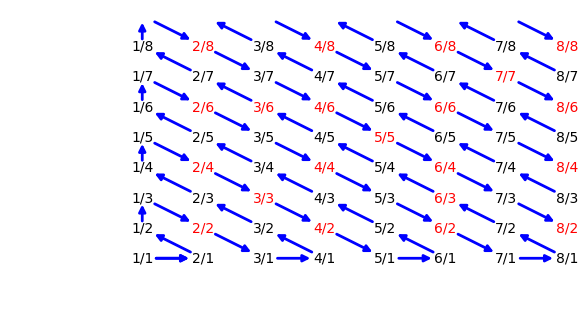

In [12]:
# Kod rysujący tabelę z liczbami wymiernymi.

A = text("", (-1, -1))
for i in range(1, 9):
    for j in range(1, 9):
        if GCD(i, j) == 1:
            A += text(str(i)+"/"+str(j), (i, j), color = 'black')
        else:
            A += text(str(i)+"/"+str(j), (i, j), color = 'red')
        if i>=2 and (i+j)%2 == 1:
            A += arrow((i, j), (i-1, j+1), arrowshorten = 20, arrowsize = 2)
        if i>=2 and (i+j)%2 == 0:
            A += arrow((i-1, j+1), (i, j), arrowshorten = 20, arrowsize = 2)
        if i == 1 and j >=2 and j%2 == 0:
            A += arrow((i, j), (i, j+1), arrowshorten = 10, arrowsize = 2)
        if j == 1 and i%2 == 1:
            A += arrow((i, j), (i+1, j), arrowshorten = 20, arrowsize = 2)
        if i == 1 and j == 1:
            A += arrow((1,1), (2, 1), arrowshorten = 20, arrowsize = 2)
A.show(axes = false, aspect_ratio = 0.5)

W ten sposób uzyskaliśmy ciąg zawierający wszystkie dodatnie liczby wymierne - jego pierwsze wyrazy to:

$$
\frac 11, \frac 21, \frac 12, \frac 13, \frac 22, \frac 31, \ldots.
$$

Każda liczba powtarza się w tym ciągu nieskończenie wiele razy (bo np. $\frac 11 = \frac 22 = \frac 33 = \ldots = 1$), ale to nie problem. Możemy przecież wykreślić powtarzające się elementy z ciągu (zaznaczyliśmy wykreślane elementy w tabeli na czerwono). Oto pierwsze wyrazy uzyskanego w ten sposób ciągu:

$$
1, 2, \frac 12, \frac 13, 3, 4, \frac 32, \frac 23, \frac 14, \frac 15, 5, \ldots
$$

### Przykład

Okazuje się, że nie każdy zbiór jest przeliczalny. Naszkicujemy teraz dowód faktu, że odcinek $(0, 1)$ jest nieprzeliczalny. Jest to tak zwana **metoda przekątniowa Cantora**. Załóżmy nie wprost, że udało nam się ustawić wszystkie liczby z przedziału $(0, 1)$ w ciąg $a_1, a_2, a_3, \ldots$. Rozważmy rozwinięcia dziesiętne liczb w ciągu. Jeżeli któraś z liczb na skończone rozwinięcie, dopiszmy nieskończenie wiele zer. Utwórzmy nową liczbę $a \in (0, 1)$ w następujący sposób:
- jej pierwszą cyfrą po przecinku jest dowolna cyfra różna od pierwszej cyfry liczby $a_1$ oraz od cyfry $9$,
- jej drugą cyfrą po przecinku jest dowolna cyfra różna od drugiej cyfry liczby $a_2$ oraz od cyfry $9$,
- jej trzecią cyfrą po przecinku jest dowolna cyfra różna od trzeciej cyfry liczby $a_3$ oraz od cyfry $9$,

i tak dalej. Ponieważ w zapisie liczby $a$ nie występuje cyfra $9$, ma ona jednoznaczny zapis dziesiętny. Liczba $a$ nie może występować w tym ciągu, ponieważ różni się przynajmniej jedną cyfrą z każdą liczbą w ciągu. Dla przykładu, jeżeli liczby w ciągu wyglądają następująco:

$$
a_1 = 0,{ \color{red}7}2914153946100800927239825167455700423140031213160 \ldots
$$

$$
a_2 = 0,0{ \color{red}5}703499398506417803443814288344130324488652422423 \ldots
$$

$$
a_3 = 0,47{ \color{red}2}60549464937888464857234409059404878273865237408 \ldots
$$

$$
a_4 = 0,848{ \color{red}6}4489486821992621001453107232909353022794063046 \ldots
$$

$$
a_5 = 0,1245{ \color{red}0}781586846597827135854060075612975208532014674 \ldots
$$

$$
a_6 = 0,68053{ \color{red}0}68505231436803593524867561561641622148807372 \ldots
$$

$$
a_7 = 0,643680{ \color{red}6}9780985694325900682868134090738072367639157 \ldots
$$

$$
a_8 = 0,3979407{ \color{red}2}202696262936617027211195299172355122743815 \ldots
$$

$$
a_9 = 0,94284775{ \color{red}6}78362930147489518107254361959917702779744 \ldots
$$

$$
a_{10} = 0,060679495{ \color{red}9}7097863119018446677681120880732956824642 \ldots
$$

to możemy przyjąć $a = 0, 8637117370 \ldots$. Przykład ten ilustruje przy okazji, czemu argument ten nazywa się metodą przekątniową.

Zauważmy, że nieprzeliczalny jest zatem również dowolny zbiór zawierający przedział $(0, 1)$, np. $[0, 1]$ lub $\mathbb R$. Istotnie, gdyby np. wszystkie liczby rzeczywiste można było ustawić w ciąg, to po wykreśleniu liczb spoza przedziału $(0, 1)$, otrzymalibyśmy ciąg elementów $(0, 1)$ - sprzeczność!

>**Uwaga:** pojęcie przeliczalności ma duże znaczenie w algorytmice. Przykładowo, okazuje się, że zbiór programów w danym języku programowania jest przeliczalny. Zbiór funkcji $f : \mathbb N \to \mathbb N$ jest jednak nieprzeliczalny. Zatem nie każdą funkcję można zapisać za pomocą programu komputerowego!

---
# Zadania do samodzielnego rozwiązania

### Przykład do samodzielnego rozwiązania

Narysuj zbiory:
- $\{0, 2, 4\} \times \{ 1, 3, 5 \}$,
- $\bigg((1, 2] \cup \{3 \} \bigg) \times \bigg( \{ 1 \} \cup [2, 4) \bigg)$,
- $(1, 2] \times \{ 1, 3, 5 \}$,
- $(- \infty, 0) \times (1, 4]$.

### Przykład do samodzielnego rozwiązania

Ile jest liczb całkowitych dodatnich nie większych niż 8000 jest podzielnych co najmniej przez jedną z liczb: 3, 5 lub 7? 

### Przykład do samodzielnego rozwiązania

Ile elementów przebiega pętla zagnieżdżona:
``` 
for i = 1 to 5:
        for j = 8 to 20:
            ...
```
a ile dwie osobne pętle:

``` 
for i = 1 to 5:
    ...
for j = 8 to 20:
    ...
```
?


### Przykład do samodzielnego rozwiązania

Liczba $t \in \mathbb Z_+$ jest większa od 1. Wiadomo, że zbiór:

$$
(\{ x \in \mathbb Z : x^2 <10 \} \times \{ x \in \mathbb Z : x^2 \le 16 \}) \cup (\{ 2, 3, 4, 5 \} \times \{ 1, 2, 3, \ldots t \})
$$

ma 79 elementów. Znajdź $t$.

### Przykład do samodzielnego rozwiązania

Czy zbiór liczb nieparzystych jest przeliczalny?

### Przykład do samodzielnego rozwiązania

Czy zbiór wszystkich funkcji liniowych o współczynnikach wymiernych jest przeliczalny?

### Przykład do samodzielnego rozwiązania

Czy zbiór $[0, 1] \times [0, 1]$ jest przeliczalny?

### Przykład do samodzielnego rozwiązania

Czy zbiór $\mathbb N \times \mathbb N$ jest przeliczalny?

### Przykład do samodzielnego rozwiązania

Czy zbiór ciągów binarnych skończonej długości jest przeliczalny? A co ze zbiorem ciągów binarnych **nieskończonej** długości?

>Uwaga: ciąg binarny to ciąg złożony z samych zer i jedynek, np. $(0, 1, 0, 0, 0, 1, 1, 0)$.